In [135]:
from src.image_loaders import AerialCarsImageLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

(24, 52, 3)


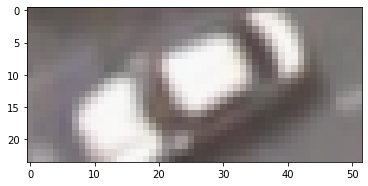

In [136]:
aerialCarsImageLoader = AerialCarsImageLoader()

image = aerialCarsImageLoader.load_image(
    '../data/raw/aerial-cars-dataset/MOS75.png',
    '../data/raw/aerial-cars-dataset/MOS75.txt'
)

car = image.get_car(image.bnd_boxes[6])
print(car.shape)
plt.imshow(car)

In [137]:
# car = cv2.copyMakeBorder(car,5,0,5,0,cv2.BORDER_CONSTANT,value=[0,0,0])
if car.shape[0] > car.shape[1]:
    car = cv2.rotate(car, cv2.ROTATE_90_CLOCKWISE)
car = resize(car, (32, 64))
car = np.float32(car)

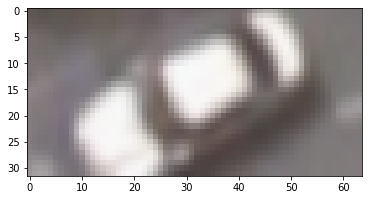

In [138]:
plt.imshow(car)

### HOG

source: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

In [139]:
#resize image
resized_img = car

#generating HOG features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(4, 4),
cells_per_block=(2, 2), visualize=True, multichannel=True)

print('\n\nShape of Image Features\n\n')
print(fd.shape)



Shape of Image Features


(3780,)


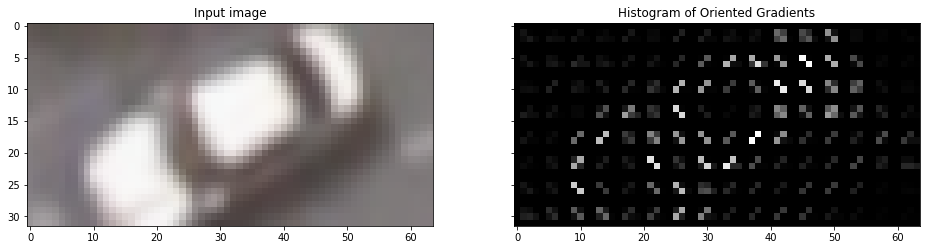

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

### Local binary patterns

In [141]:
# source
# https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/

def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 
   
img_bgr = car
   
height, width, _ = img_bgr.shape 
   
# We need to convert RGB image  
# into gray one because gray  
# image has one channel only. 
img_gray = cv2.cvtColor(img_bgr, 
                        cv2.COLOR_BGR2GRAY) 
   
# Create a numpy array as  
# the same height and width  
# of RGB image 
img_lbp = np.zeros((height, width), 
                   np.uint8) 
   
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 

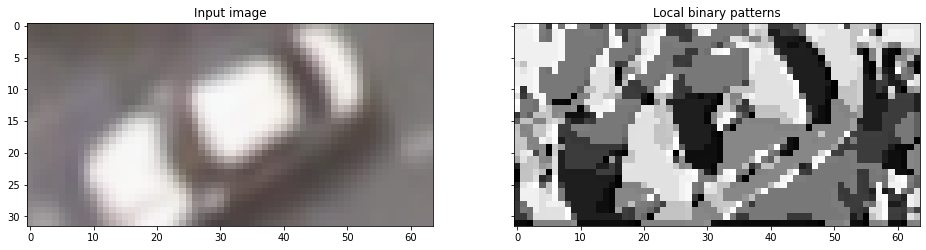

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(img_bgr) 
ax1.set_title('Input image') 

ax2.imshow(img_lbp, cmap ="gray") 
ax2.set_title('Local binary patterns')

plt.show()